# FLood Forecasting


## Data Acquisition

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [29]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [4]:
data = pd.read_csv('dataset/barrages.csv')
data

,Nom_Fr,Nom_Ar,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,مـــــلاق,0.000000,1,0.02000,15.12510,0.000000,12.089900,0.02000,2.691000,...,15.51570,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-01 00:00:00
1,sarrat,سراط,0.001724,36,0.00000,8.27161,0.001724,6.556630,0.00000,2.795260,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-01 00:00:00
2,benmetir,بنيمطيــر,0.000000,2,0.06048,14.54820,0.000000,9.558420,0.06048,3.374930,...,23.27610,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-01 00:00:00
3,kasseb,كســاب,0.057657,3,0.07776,27.40440,0.057657,13.330200,0.07776,10.273000,...,36.95000,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-01 00:00:00
4,barbara,بربرة,0.036666,4,0.00000,47.08290,0.036666,22.204800,0.00000,13.771100,...,64.04940,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,chiba,شيبـــــــة,0.001674,26,0.00000,1.18948,0.003194,0.228848,0.00000,0.383087,...,1.47732,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-03 00:00:00
12828,masri,مصــــــري,0.001051,27,0.00000,5.13766,0.003266,0.391773,0.00000,1.050190,...,5.17704,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-03 00:00:00
12829,lebna,لبنــــــــة,0.004818,28,0.00000,12.66110,0.011156,2.389730,0.00229,0.657473,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-03 00:00:00
12830,hma,الحمـــــى,0.000881,29,0.00000,2.19623,0.001827,1.681380,0.00000,0.017334,...,2.04299,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-03 00:00:00


## Data Cleaning

Defining the columns

In [7]:
df = pd.DataFrame(data, columns = ['Nom_Fr','Nom_Ar','apports','id_barrage','lachers','stock','cumul_mensuel_apports','cumul_annuel_apports','cumul_mensuel_lachers','cumul_annuel_lachers','moy_mois','cumul_annee_prec','moy_periode','stock_annee_prec','Cap_tot_act','Cote','Cap_tot_init','fonctionnel','Annee_prod','Latitude','Longitude','Bassin_versant','Date'])
df

,Nom_Fr,Nom_Ar,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,مـــــلاق,0.000000,1,0.02000,15.12510,0.000000,12.089900,0.02000,2.691000,...,15.51570,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-01 00:00:00
1,sarrat,سراط,0.001724,36,0.00000,8.27161,0.001724,6.556630,0.00000,2.795260,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-01 00:00:00
2,benmetir,بنيمطيــر,0.000000,2,0.06048,14.54820,0.000000,9.558420,0.06048,3.374930,...,23.27610,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-01 00:00:00
3,kasseb,كســاب,0.057657,3,0.07776,27.40440,0.057657,13.330200,0.07776,10.273000,...,36.95000,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-01 00:00:00
4,barbara,بربرة,0.036666,4,0.00000,47.08290,0.036666,22.204800,0.00000,13.771100,...,64.04940,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,chiba,شيبـــــــة,0.001674,26,0.00000,1.18948,0.003194,0.228848,0.00000,0.383087,...,1.47732,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-03 00:00:00
12828,masri,مصــــــري,0.001051,27,0.00000,5.13766,0.003266,0.391773,0.00000,1.050190,...,5.17704,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-03 00:00:00
12829,lebna,لبنــــــــة,0.004818,28,0.00000,12.66110,0.011156,2.389730,0.00229,0.657473,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-03 00:00:00
12830,hma,الحمـــــى,0.000881,29,0.00000,2.19623,0.001827,1.681380,0.00000,0.017334,...,2.04299,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-03 00:00:00


In [8]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

Nom_Fr                    object
Nom_Ar                    object
apports                  float64
id_barrage                 int64
lachers                  float64
stock                    float64
cumul_mensuel_apports    float64
cumul_annuel_apports     float64
cumul_mensuel_lachers    float64
cumul_annuel_lachers     float64
moy_mois                 float64
cumul_annee_prec         float64
moy_periode              float64
stock_annee_prec         float64
Cap_tot_act              float64
Cote                     float64
Cap_tot_init             float64
fonctionnel              float64
Annee_prod                 int64
Latitude                 float64
Longitude                float64
Bassin_versant           float64
Date                      object
dtype: object


drop nom_ar column because we don't need the arabic version of the name

In [11]:
df=df.drop('Nom_Ar',1)
df

,Nom_Fr,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,0.000000,1,0.02000,15.12510,0.000000,12.089900,0.02000,2.691000,12.578500,...,15.51570,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-01 00:00:00
1,sarrat,0.001724,36,0.00000,8.27161,0.001724,6.556630,0.00000,2.795260,0.775000,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-01 00:00:00
2,benmetir,0.000000,2,0.06048,14.54820,0.000000,9.558420,0.06048,3.374930,9.809260,...,23.27610,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-01 00:00:00
3,kasseb,0.057657,3,0.07776,27.40440,0.057657,13.330200,0.07776,10.273000,8.238380,...,36.95000,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-01 00:00:00
4,barbara,0.036666,4,0.00000,47.08290,0.036666,22.204800,0.00000,13.771100,18.461400,...,64.04940,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,chiba,0.001674,26,0.00000,1.18948,0.003194,0.228848,0.00000,0.383087,1.110560,...,1.47732,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-03 00:00:00
12828,masri,0.001051,27,0.00000,5.13766,0.003266,0.391773,0.00000,1.050190,0.629791,...,5.17704,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-03 00:00:00
12829,lebna,0.004818,28,0.00000,12.66110,0.011156,2.389730,0.00229,0.657473,3.680890,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-03 00:00:00
12830,hma,0.000881,29,0.00000,2.19623,0.001827,1.681380,0.00000,0.017334,0.402662,...,2.04299,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-03 00:00:00


In [12]:
df.drop_duplicates(keep=False,inplace=True)
df

,Nom_Fr,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,...,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Latitude,Longitude,Bassin_versant,Date
0,mellegue,0.000000,1,0.02000,15.12510,0.000000,12.089900,0.02000,2.691000,12.578500,...,15.51570,51.1300,265.00,267.670,1.0,1954,36.3144,8.70273,10300.0,2022-01-01 00:00:00
1,sarrat,0.001724,36,0.00000,8.27161,0.001724,6.556630,0.00000,2.795260,0.775000,...,NaN,21.0000,546.00,21.000,1.0,2016,49.9167,26.58330,1850.0,2022-01-01 00:00:00
2,benmetir,0.000000,2,0.06048,14.54820,0.000000,9.558420,0.06048,3.374930,9.809260,...,23.27610,60.3930,436.50,61.630,1.0,1954,36.7471,8.74188,103.0,2022-01-01 00:00:00
3,kasseb,0.057657,3,0.07776,27.40440,0.057657,13.330200,0.07776,10.273000,8.238380,...,36.95000,76.9000,292.04,81.875,1.0,1968,36.7614,9.00230,101.0,2022-01-01 00:00:00
4,barbara,0.036666,4,0.00000,47.08290,0.036666,22.204800,0.00000,13.771100,18.461400,...,64.04940,64.7000,182.00,74.820,1.0,1998,36.7341,8.53173,177.0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,chiba,0.001674,26,0.00000,1.18948,0.003194,0.228848,0.00000,0.383087,1.110560,...,1.47732,5.0450,77.88,7.800,1.0,1963,36.6923,10.76970,64.0,2021-01-03 00:00:00
12828,masri,0.001051,27,0.00000,5.13766,0.003266,0.391773,0.00000,1.050190,0.629791,...,5.17704,5.1930,163.00,6.900,1.0,1968,36.5340,10.49110,53.0,2021-01-03 00:00:00
12829,lebna,0.004818,28,0.00000,12.66110,0.011156,2.389730,0.00229,0.657473,3.680890,...,22.48180,23.3053,18.04,30.100,1.0,1986,36.7388,10.92180,199.0,2021-01-03 00:00:00
12830,hma,0.000881,29,0.00000,2.19623,0.001827,1.681380,0.00000,0.017334,0.402662,...,2.04299,12.8540,102.40,12.100,1.0,2002,36.5874,10.30400,123.0,2021-01-03 00:00:00


In [16]:
pd.options.display.float_format = "{:,.2f}".format
print(df)

         Nom_Fr  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.13                   0.00   
1        sarrat     0.00          36     0.00   8.27                   0.00   
2      benmetir     0.00           2     0.06  14.55                   0.00   
3        kasseb     0.06           3     0.08  27.40                   0.06   
4       barbara     0.04           4     0.00  47.08                   0.04   
...         ...      ...         ...      ...    ...                    ...   
12827     chiba     0.00          26     0.00   1.19                   0.00   
12828     masri     0.00          27     0.00   5.14                   0.00   
12829     lebna     0.00          28     0.00  12.66                   0.01   
12830       hma     0.00          29     0.00   2.20                   0.00   
12831      abid     0.00          30     0.00   4.16                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

drop the latitude and longitude columns becuase we do not need the geographical coordinations of the dam

In [17]:
df=df.drop('Latitude',1)
df=df.drop('Latitude',1)
print(df)

         Nom_Fr  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.13                   0.00   
1        sarrat     0.00          36     0.00   8.27                   0.00   
2      benmetir     0.00           2     0.06  14.55                   0.00   
3        kasseb     0.06           3     0.08  27.40                   0.06   
4       barbara     0.04           4     0.00  47.08                   0.04   
...         ...      ...         ...      ...    ...                    ...   
12827     chiba     0.00          26     0.00   1.19                   0.00   
12828     masri     0.00          27     0.00   5.14                   0.00   
12829     lebna     0.00          28     0.00  12.66                   0.01   
12830       hma     0.00          29     0.00   2.20                   0.00   
12831      abid     0.00          30     0.00   4.16                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

In [20]:
df= df.rename(columns={'Nom_Fr': 'station'})
df

,station,apports,id_barrage,lachers,stock,cumul_mensuel_apports,cumul_annuel_apports,cumul_mensuel_lachers,cumul_annuel_lachers,moy_mois,cumul_annee_prec,moy_periode,stock_annee_prec,Cap_tot_act,Cote,Cap_tot_init,fonctionnel,Annee_prod,Bassin_versant,Date
0,mellegue,0.00,1,0.02,15.13,0.00,12.09,0.02,2.69,12.58,26.25,85.64,15.52,51.13,265.00,267.67,1.00,1954,"10,300.00",2022-01-01 00:00:00
1,sarrat,0.00,36,0.00,8.27,0.00,6.56,0.00,2.80,0.78,NaN,8.77,NaN,21.00,546.00,21.00,1.00,2016,"1,850.00",2022-01-01 00:00:00
2,benmetir,0.00,2,0.06,14.55,0.00,9.56,0.06,3.37,9.81,8.22,10.40,23.28,60.39,436.50,61.63,1.00,1954,103.00,2022-01-01 00:00:00
3,kasseb,0.06,3,0.08,27.40,0.06,13.33,0.08,10.27,8.24,11.75,11.58,36.95,76.90,292.04,81.88,1.00,1968,101.00,2022-01-01 00:00:00
4,barbara,0.04,4,0.00,47.08,0.04,22.20,0.00,13.77,18.46,24.09,22.35,64.05,64.70,182.00,74.82,1.00,1998,177.00,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,chiba,0.00,26,0.00,1.19,0.00,0.23,0.00,0.38,1.11,1.50,3.02,1.48,5.04,77.88,7.80,1.00,1963,64.00,2021-01-03 00:00:00
12828,masri,0.00,27,0.00,5.14,0.00,0.39,0.00,1.05,0.63,0.46,2.08,5.18,5.19,163.00,6.90,1.00,1968,53.00,2021-01-03 00:00:00
12829,lebna,0.00,28,0.00,12.66,0.01,2.39,0.00,0.66,3.68,18.29,7.66,22.48,23.31,18.04,30.10,1.00,1986,199.00,2021-01-03 00:00:00
12830,hma,0.00,29,0.00,2.20,0.00,1.68,0.00,0.02,0.40,0.28,2.60,2.04,12.85,102.40,12.10,1.00,2002,123.00,2021-01-03 00:00:00


## Data Visualization

In [21]:
currentstock_perdam = df['stock'].groupby(df['station'])
print(currentstock_perdam.mean())

station
abid           2.93
barbara       52.47
benmetir      16.78
bezirk         1.58
birmcherga    27.93
bouheurtma    26.87
chiba          0.74
elbrek         0.09
elhaouareb     0.40
gamgoum       17.59
ghezala        5.74
harka         28.99
hma            1.41
joumine       39.88
kasseb        31.21
kebir          5.86
lakhmess       2.03
lebna          8.62
masri          4.12
melah          8.81
mellegue      10.55
moula         25.80
nebhana        4.14
rmel           2.71
rmil           0.91
sarrat         6.37
sejnane       98.76
selbarrak    240.84
sficifa        1.74
sidiach        2.07
sidisaad      40.64
sidisalem    202.09
siliana        5.49
tine           6.09
zarga         15.86
ziatine       22.68
Name: stock, dtype: float64


In [23]:
predstock_perdam = df['stock_annee_prec'].groupby(df['station'])
print(predstock_perdam.mean())

station
abid           6.04
barbara       57.45
benmetir      31.24
bezirk         2.81
birmcherga    32.82
bouheurtma    39.24
chiba          0.63
elbrek         1.03
elhaouareb     1.13
gamgoum       17.38
ghezala        6.52
harka           NaN
hma            1.51
joumine       41.53
kasseb        43.48
kebir          6.22
lakhmess       4.00
lebna         17.32
masri          4.42
melah         21.11
mellegue      20.89
moula         25.67
nebhana       10.62
rmel           6.83
rmil           1.05
sarrat          NaN
sejnane       91.92
selbarrak    237.46
sficifa        1.56
sidiach        3.79
sidisaad      55.08
sidisalem    360.57
siliana       14.27
tine          10.10
zarga         18.98
ziatine       25.80
Name: stock_annee_prec, dtype: float64


### Sidisalem

         station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
5      sidisalem     0.56           5     0.35 127.58                   0.56   
41     sidisalem     0.34           5     0.35 127.37                  42.27   
77     sidisalem     0.34           5     0.35 127.37                  41.92   
113    sidisalem     0.13           5     0.35 127.37                  41.58   
149    sidisalem     0.34           5     0.35 127.58                  41.46   
...          ...      ...         ...      ...    ...                    ...   
12666  sidisalem     0.86           5     0.04 264.47                   7.34   
12700  sidisalem     0.28           5     0.04 263.59                   6.48   
12734  sidisalem     0.86           5     0.04 263.30                   6.20   
12768  sidisalem     0.86           5     0.04 262.43                   5.34   
12802  sidisalem     0.86           5     0.04 261.56                   4.48   

       cumul_annuel_apports  cumul_mens

<AxesSubplot:>

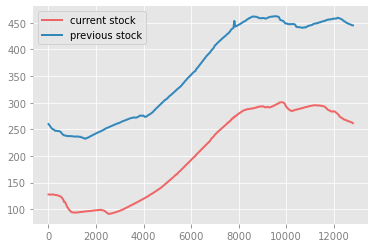

In [48]:
dfsidisalem= df[df['station']=='sidisalem']
print(dfsidisalem)

stocksidisalem= pd.DataFrame()
stocksidisalem['current stock']=dfsidisalem['stock']
stocksidisalem['previous stock']=dfsidisalem['stock_annee_prec']
print(stocksidisalem)

stocksidisalem.plot()


### Sejnane

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
11     sejnane     0.23           9     0.75 123.47                   0.23   
47     sejnane     0.09           9     0.75 123.99                  44.57   
83     sejnane     0.16           9     0.75 124.66                  44.48   
119    sejnane     0.23           9     0.75 125.25                  44.32   
155    sejnane     0.23           9     0.75 125.76                  44.09   
...        ...      ...         ...      ...    ...                    ...   
12672  sejnane     0.11           9     0.10 106.54                   2.65   
12706  sejnane     0.11           9     0.10 106.54                   2.54   
12740  sejnane     0.03           9     0.10 106.54                   2.44   
12774  sejnane     0.40           9     0.26 106.61                   2.40   
12808  sejnane     0.59           9     0.72 106.47                   2.00   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

<AxesSubplot:>

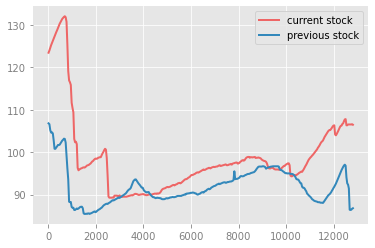

In [40]:
dfsejnane= df[df['station']=='sejnane']
print(dfsejnane)

stocksejnane= pd.DataFrame()
stocksejnane['current stock']=dfsejnane['stock']
stocksejnane['previous stock']=dfsejnane['stock_annee_prec']
print(stocksejnane)

stocksejnane.plot()

### Joumine

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
7      joumine     0.14           7     0.10  51.09                   0.14   
43     joumine     0.11           7     0.10  51.05                  27.05   
79     joumine     0.14           7     0.10  51.05                  26.95   
115    joumine     0.10           7     0.10  51.01                  26.81   
151    joumine     0.22           7     0.10  51.01                  26.70   
...        ...      ...         ...      ...    ...                    ...   
12668  joumine     0.14           7     0.01  40.09                   1.53   
12702  joumine     0.21           7     0.01  39.96                   1.39   
12736  joumine     0.22           7     0.01  39.76                   1.18   
12770  joumine     0.19           7     0.02  39.56                   0.96   
12804  joumine     0.26           7     0.02  39.40                   0.77   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

<AxesSubplot:>

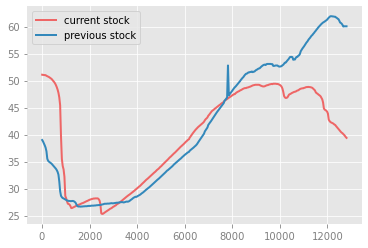

In [41]:
dfjoumine= df[df['station']=='joumine']
print(dfjoumine)

stockjoumine= pd.DataFrame()
stockjoumine['current stock']=dfjoumine['stock']
stockjoumine['previous stock']=dfjoumine['stock_annee_prec']
print(stockjoumine)

stockjoumine.plot()

### Siliana

       station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
19     siliana     0.00          14     0.00   2.75                   0.00   
55     siliana     0.00          14     0.00   2.75                   0.16   
91     siliana     0.00          14     0.00   2.75                   0.16   
127    siliana     0.00          14     0.00   2.75                   0.16   
163    siliana     0.00          14     0.00   2.75                   0.15   
...        ...      ...         ...      ...    ...                    ...   
12679  siliana     0.04          14     0.00  10.53                   0.27   
12713  siliana     0.04          14     0.00  10.50                   0.23   
12747  siliana     0.04          14     0.00  10.46                   0.19   
12781  siliana     0.04          14     0.00  10.43                   0.15   
12815  siliana     0.04          14     0.00  10.40                   0.11   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annue

<AxesSubplot:>

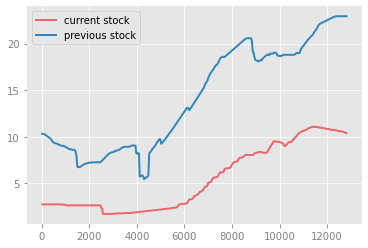

In [42]:
dfsiliana= df[df['station']=='siliana']
print(dfsiliana)

stocksiliana= pd.DataFrame()
stocksiliana['current stock']=dfsiliana['stock']
stocksiliana['previous stock']=dfsiliana['stock_annee_prec']
print(stocksiliana)

stocksiliana.plot()

### Birmcherga

          station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
22     birmcherga     0.01          17     0.00  22.15                   0.01   
58     birmcherga     0.01          17     0.00  22.15                   0.86   
94     birmcherga     0.00          17     0.00  22.15                   0.85   
130    birmcherga     0.01          17     0.00  22.20                   0.85   
166    birmcherga     0.01          17     0.00  22.20                   0.84   
...           ...      ...         ...      ...    ...                    ...   
12682  birmcherga     0.01          17     0.00  33.32                   0.05   
12716  birmcherga     0.01          17     0.00  33.32                   0.05   
12750  birmcherga     0.01          17     0.00  33.32                   0.04   
12784  birmcherga     0.01          17     0.00  33.32                   0.03   
12818  birmcherga     0.01          17     0.00  33.32                   0.02   

       cumul_annuel_apports

<AxesSubplot:>

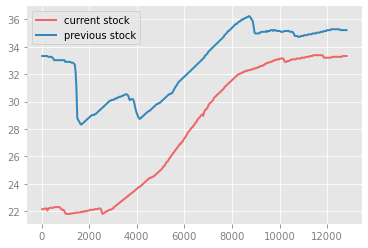

In [37]:
dfbirmcherga= df[df['station']=='birmcherga']
print(dfbirmcherga)

stockbirmcherga= pd.DataFrame()
stockbirmcherga['current stock']=dfbirmcherga['stock']
stockbirmcherga['previous stock']=dfbirmcherga['stock_annee_prec']
print(stockbirmcherga)

stockbirmcherga.plot()

### Bouheurtma

          station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
6      bouheurtma     0.06           6     0.02  26.76                   0.06   
42     bouheurtma     0.02           6     0.02  26.73                  10.93   
78     bouheurtma     0.02           6     0.02  26.73                  10.91   
114    bouheurtma     0.09           6     0.02  26.73                  10.89   
150    bouheurtma     0.06           6     0.02  26.65                  10.80   
...           ...      ...         ...      ...    ...                    ...   
12667  bouheurtma     0.13           6     0.17  30.64                   0.91   
12701  bouheurtma     0.11           6     0.03  30.68                   0.78   
12735  bouheurtma     0.13           6     0.09  30.60                   0.67   
12769  bouheurtma     0.11           6     0.03  30.56                   0.54   
12803  bouheurtma     0.11           6     0.03  30.48                   0.43   

       cumul_annuel_apports

<AxesSubplot:>

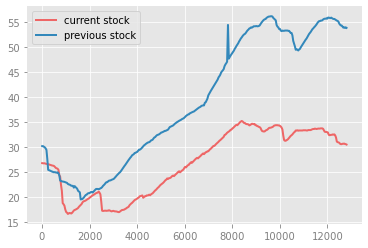

In [38]:
dfbouheurtma= df[df['station']=='bouheurtma']
print(dfbouheurtma)

stockbouheurtma= pd.DataFrame()
stockbouheurtma['current stock']=dfbouheurtma['stock']
stockbouheurtma['previous stock']=dfbouheurtma['stock_annee_prec']
print(stockbouheurtma)

stockbouheurtma.plot()

### Hma

      station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
34        hma     0.00          29     0.00   0.74                   0.00   
70        hma     0.00          29     0.00   0.74                   0.02   
106       hma     0.00          29     0.00   0.74                   0.02   
142       hma     0.00          29     0.00   0.75                   0.02   
178       hma     0.00          29     0.00   0.75                   0.02   
...       ...      ...         ...      ...    ...                    ...   
12694     hma     0.00          29     0.00   2.19                   0.00   
12728     hma     0.00          29     0.00   2.19                   0.00   
12762     hma     0.00          29     0.00   2.19                   0.00   
12796     hma     0.00          29     0.00   2.20                   0.00   
12830     hma     0.00          29     0.00   2.20                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers  cumul_annuel_lachers  \

<AxesSubplot:>

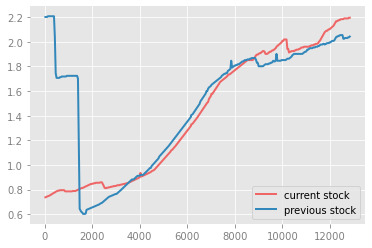

In [43]:
dfhma= df[df['station']=='hma']
print(dfhma)

stockhma= pd.DataFrame()
stockhma['current stock']=dfhma['stock']
stockhma['previous stock']=dfhma['stock_annee_prec']
print(stockhma)

stockhma.plot()

### Mellegue

        station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.13                   0.00   
36     mellegue     0.00           1     0.02  15.16                   1.89   
72     mellegue     0.00           1     0.02  15.22                   1.89   
108    mellegue     0.00           1     0.02  15.25                   1.89   
144    mellegue     0.00           1     0.02  15.31                   1.89   
...         ...      ...         ...      ...    ...                    ...   
12662  mellegue     0.06           1     0.09  15.19                   0.19   
12696  mellegue     0.03           1     0.09  15.22                   0.14   
12730  mellegue     0.03           1     0.09  15.28                   0.11   
12764  mellegue     0.06           1     0.09  15.34                   0.08   
12798  mellegue     0.03           1     0.09  15.37                   0.03   

       cumul_annuel_apports  cumul_mensuel_lachers 

<AxesSubplot:>

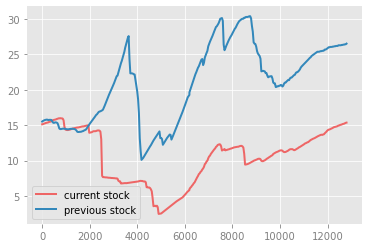

In [31]:
dfmellegue= df[df['station']=='mellegue']
print(dfmellegue)

stockmellegue= pd.DataFrame()
stockmellegue['current stock']=dfmellegue['stock']
stockmellegue['previous stock']=dfmellegue['stock_annee_prec']
print(stockmellegue)

stockmellegue.plot()

        station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
0      mellegue     0.00           1     0.02  15.13                   0.00   
36     mellegue     0.00           1     0.02  15.16                   1.89   
72     mellegue     0.00           1     0.02  15.22                   1.89   
108    mellegue     0.00           1     0.02  15.25                   1.89   
144    mellegue     0.00           1     0.02  15.31                   1.89   
...         ...      ...         ...      ...    ...                    ...   
12662  mellegue     0.06           1     0.09  15.19                   0.19   
12696  mellegue     0.03           1     0.09  15.22                   0.14   
12730  mellegue     0.03           1     0.09  15.28                   0.11   
12764  mellegue     0.06           1     0.09  15.34                   0.08   
12798  mellegue     0.03           1     0.09  15.37                   0.03   

       cumul_annuel_apports  cumul_mensuel_lachers 

<AxesSubplot:>

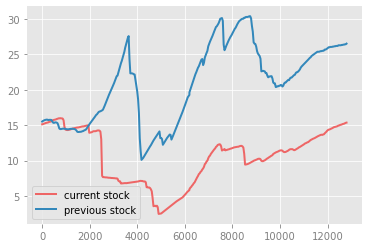

In [30]:
x=["abid",'barbara','benmetir','bezirk','birmcherga','bouheurtma','chiba','elbrek','elhaouareb','gamgoum','ghezala','harka','hma','joumine','kasseb','kebir','lakhmess','lebna',
'masri','melah','mellegue','moula','nebhana','rmel','rmil','sarrat','sejnane','selbarrak','sficia',
'sidiach','sidisaad','sidisalem','siliana','tine','zarga','ziatine']

### Sidisaad

        station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
25     sidisaad     0.01          20     0.00  29.48                   0.01   
61     sidisaad     0.01          20     0.00  29.48                   0.34   
97     sidisaad     0.01          20     0.00  29.48                   0.33   
133    sidisaad     0.01          20     0.00  29.48                   0.32   
169    sidisaad     0.01          20     0.00  29.48                   0.31   
...         ...      ...         ...      ...    ...                    ...   
12685  sidisaad     0.00          20     0.04  57.29                   0.04   
12719  sidisaad     0.04          20     0.03  57.39                   0.04   
12753  sidisaad     0.00          20     0.04  57.39                   0.00   
12787  sidisaad     0.00          20     0.06  57.49                   0.00   
12821  sidisaad     0.00          20     0.06  57.59                   0.00   

       cumul_annuel_apports  cumul_mensuel_lachers 

<AxesSubplot:>

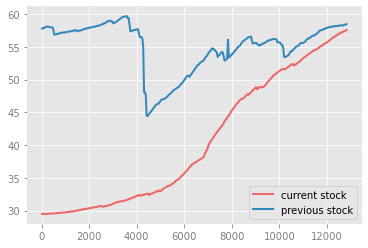

In [44]:
dfsidisaad= df[df['station']=='sidisaad']
print(dfsidisaad)

stocksidisaad= pd.DataFrame()
stocksidisaad['current stock']=dfsidisaad['stock']
stocksidisaad['previous stock']=dfsidisaad['stock_annee_prec']
print(stocksidisaad)

stocksidisaad.plot()

### ELhaouareb

          station  apports  id_barrage  lachers  stock  cumul_mensuel_apports  \
26     elhaouareb     0.00          21     0.00   0.30                   0.00   
62     elhaouareb     0.00          21     0.00   0.30                   0.11   
98     elhaouareb     0.01          21     0.01   0.30                   0.11   
134    elhaouareb     0.01          21     0.01   0.30                   0.10   
170    elhaouareb     0.00          21     0.00   0.30                   0.09   
...           ...      ...         ...      ...    ...                    ...   
12686  elhaouareb     0.00          21     0.01   1.66                   0.00   
12720  elhaouareb     0.00          21     0.01   1.72                   0.00   
12754  elhaouareb     0.00          21     0.01   1.78                   0.00   
12788  elhaouareb     0.00          21     0.01   1.81                   0.00   
12822  elhaouareb     0.00          21     0.00   1.84                   0.00   

       cumul_annuel_apports

<AxesSubplot:>

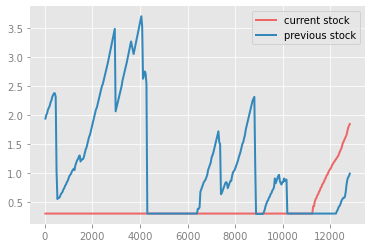

In [45]:
dfelhaouareb= df[df['station']=='elhaouareb']
print(dfelhaouareb)

stockelhaouareb= pd.DataFrame()
stockelhaouareb['current stock']=dfelhaouareb['stock']
stockelhaouareb['previous stock']=dfelhaouareb['stock_annee_prec']
print(stockelhaouareb)

stockelhaouareb.plot()